# 4.1.1.
1. Construir um gráfico que permita visualizar os níveis médios do poluente O3 nas diversas regiões de Portugal (**NUTS Code**).
2. Indicar a região com nível médio de O3 mais elevado.

## *Imports* estáticos

In [134]:
import pandas as pd
import matplotlib.pyplot as plt

## Leitura e filtro das informações do ficheiro base

In [135]:
dados = pd.read_csv('../dados/AIRPOL_data.csv', delimiter=";", header=0)
dados = dados.drop(columns=['Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15'])
dados_filtrados = dados.filter(['Country', 'NUTS_Code', 'Air_Pollutant', 'Air_Pollution_Average[ug/m3]'])
dados_o3 = dados_filtrados[(dados_filtrados['Air_Pollutant']=='O3') & (dados_filtrados['Country']=='Portugal')]
dados_o3

,Country,NUTS_Code,Air_Pollutant,Air_Pollution_Average[ug/m3]
39446,Portugal,PT,O3,"94,30"
39447,Portugal,PT,O3,"94,30"
39451,Portugal,PT1,O3,"94,30"
39453,Portugal,PT1,O3,"94,30"
39456,Portugal,PT16,O3,"98,90"
39457,Portugal,PT16,O3,"98,90"
39459,Portugal,PT17,O3,"88,10"
39460,Portugal,PT15,O3,"90,80"
39461,Portugal,PT18,O3,"91,90"
39464,Portugal,PT11,O3,"91,90"


## Obtenção dos níveis médios da poluição e construção do gráfico

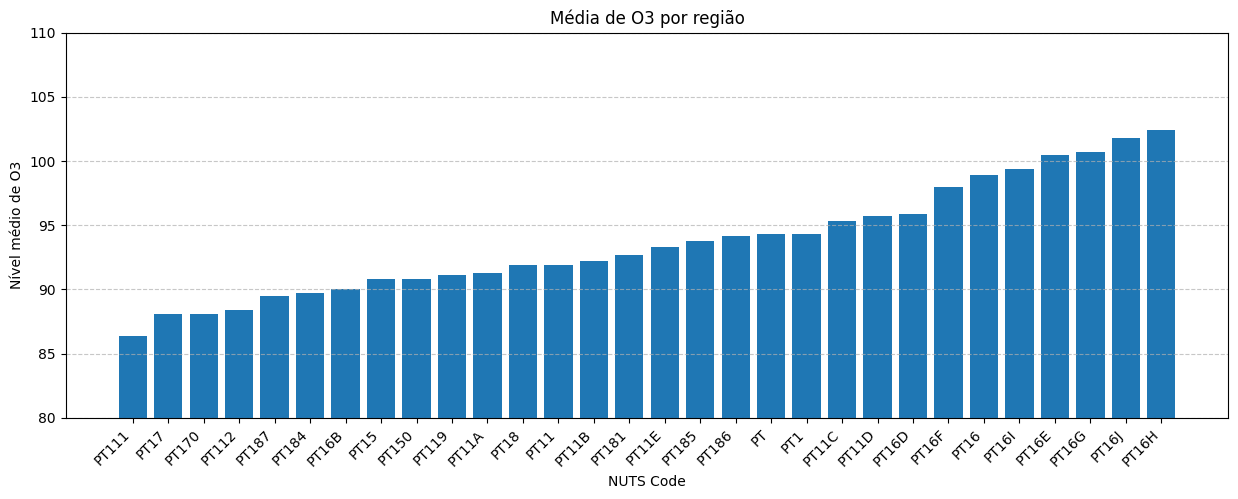

,NUTS_Code,Average Air Pollution [ug/m3]
3,PT111,86.4
22,PT17,88.1
23,PT170,88.1
4,PT112,88.4
29,PT187,89.5
26,PT184,89.7
14,PT16B,90.0
11,PT15,90.8
12,PT150,90.8
5,PT119,91.1


In [136]:
dados_o3 = dados_o3.copy() # Deixamos de ter um 'SettingWithCopyWarning'
dados_o3['Air_Pollution_Average[ug/m3]'] = dados_o3['Air_Pollution_Average[ug/m3]'].str.replace(',', '.').astype(float)
unique_o3_levels = dados_o3.groupby('NUTS_Code')['Air_Pollution_Average[ug/m3]'].mean().reset_index(name='Average Air Pollution [ug/m3]') # Dar um nome à coluna, para a usar depois
unique_o3_levels = unique_o3_levels.sort_values('Average Air Pollution [ug/m3]')

plt.figure(figsize=(15,5))
plt.bar(unique_o3_levels['NUTS_Code'], unique_o3_levels['Average Air Pollution [ug/m3]'])

plt.xlabel("NUTS Code")
plt.ylabel("Nível médio de O3")
plt.title("Média de O3 por região")

plt.xticks(rotation=45, ha="right")
plt.ylim(80,110)
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.show()
unique_o3_levels

## Obtenção da área com maior nível de poluição média

In [137]:
biggest_o3_zone = unique_o3_levels.loc[unique_o3_levels['Average Air Pollution [ug/m3]'].idxmax()]
print('Area: '+biggest_o3_zone['NUTS_Code']+'\nAverage Air Pollution: '+biggest_o3_zone['Average Air Pollution [ug/m3]'].astype(str) + ' ug/m3')

Area: PT16H
Average Air Pollution: 102.4 ug/m3
